In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime

In [2]:
df_intc = pd.read_csv('INTC/INTC_110801_110930.csv')
df_intc[-100:-1]  # df_int.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<LAST>,<VOL>
437572,INTC,0,30/09/11,15:58:00,21.355,600
437573,INTC,0,30/09/11,15:58:00,21.355,300
437574,INTC,0,30/09/11,15:58:00,21.355,100
437575,INTC,0,30/09/11,15:58:00,21.355,400
437576,INTC,0,30/09/11,15:59:00,21.355,300
...,...,...,...,...,...,...
437666,INTC,0,30/09/11,15:59:00,21.330,1600
437667,INTC,0,30/09/11,15:59:00,21.330,789
437668,INTC,0,30/09/11,15:59:00,21.330,3600
437669,INTC,0,30/09/11,15:59:00,21.330,2011


In [3]:
df_ibm = pd.read_csv('IBM/IBM_110801_110930.csv')

In [4]:
df_ibm["<TIME_DT>"] = df_ibm["<DATE>"] + " " + df_ibm["<TIME>"]
s = pd.to_datetime(df_ibm["<TIME_DT>"], format='%d/%m/%y %H:%M:%S' )  # infer_datetime_format=True)
df_ibm["<TIME_DT>"] = s
df_ibm.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<LAST>,<VOL>,<TIME_DT>
0,IBM,0,01/09/11,09:30:00,172.38,100,2011-09-01 09:30:00
1,IBM,0,01/09/11,09:30:00,172.34,100,2011-09-01 09:30:00
2,IBM,0,01/09/11,09:30:00,172.37,100,2011-09-01 09:30:00
3,IBM,0,01/09/11,09:30:00,172.37,100,2011-09-01 09:30:00
4,IBM,0,01/09/11,09:30:00,172.37,100,2011-09-01 09:30:00


In [5]:
# Bierzemy okno czasowe (godzina, dzien,  tydzien, miesiac...):
# - Obliczamy wspolczynnik korelacji Pearsona (-1 tzn. jedna rosnie a druga maleje, 0 tzn. brak korelacji, 1 tzn. jedna rosnie druga rosnie) 
# [Spolki bierzemy parami]
# - Przesuwamy wstecz jedna ze spolek i znow liczymy korelacje

In [6]:
df_intc["<TIME_DT>"] = df_intc["<DATE>"] + " " + df_intc["<TIME>"]
s = pd.to_datetime(df_intc["<TIME_DT>"], format='%d/%m/%y %H:%M:%S' )  # infer_datetime_format=True)
df_intc["<TIME_DT>"] = s
df_intc.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<LAST>,<VOL>,<TIME_DT>
0,INTC,0,01/09/11,09:30:00,20.25,147,2011-09-01 09:30:00
1,INTC,0,01/09/11,09:30:00,20.29,100,2011-09-01 09:30:00
2,INTC,0,01/09/11,09:30:00,20.29,100,2011-09-01 09:30:00
3,INTC,0,01/09/11,09:30:00,20.29,100,2011-09-01 09:30:00
4,INTC,0,01/09/11,09:30:00,20.29,100,2011-09-01 09:30:00


In [7]:
start_datetime = df_intc["<TIME_DT>"].loc[0]
offset = datetime.timedelta(minutes=60)  # ustalamy przesuniecie czasowe na poziomie 60 minut
df_intc_period = df_intc.loc[df_intc["<TIME_DT>"] <= start_datetime + offset]

In [8]:
df_ibm_period = df_ibm.loc[(df_ibm["<TIME_DT>"] >= start_datetime) & (df_ibm["<TIME_DT>"] <= start_datetime + offset)]

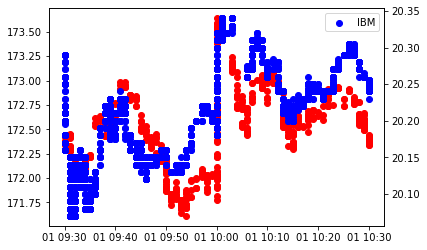

In [9]:
# TODO: legenda
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(df_ibm_period["<TIME_DT>"], df_ibm_period["<LAST>"], c='r')
ax2.scatter(df_intc_period["<TIME_DT>"], df_intc_period["<LAST>"], c='b')
plt.legend(["IBM", "INTC"])
plt.show()

In [10]:
df_ibm_period["<LAST>"].corr(df_intc_period["<LAST>"])

-0.2557729917066187

In [11]:
def group_plot_corr(df1_period, df2_period, plot=True):
    df1_period_grouped = df1_period.groupby(by=["<TIME_DT>"]).mean()
    df2_period_grouped = df2_period.groupby(by=["<TIME_DT>"]).mean()
    if plot:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.scatter(df1_period_grouped.index, df1_period_grouped["<LAST>"], c='r')
        ax2.scatter(df2_period_grouped.index, df2_period_grouped["<LAST>"], c='b')
        plt.show()
    display(df1_period_grouped["<LAST>"].corr(df2_period_grouped["<LAST>"]))

In [12]:
df_ibm_period_grouped = df_ibm_period.groupby(by=["<TIME_DT>"]).mean()
df_intc_period_grouped = df_intc_period.groupby(by=["<TIME_DT>"]).mean()
display(df_intc_period_grouped["<LAST>"].head())
display(df_intc_period_grouped.index)

<TIME_DT>
2011-09-01 09:30:00    20.205919
2011-09-01 09:31:00    20.111818
2011-09-01 09:32:00    20.107403
2011-09-01 09:33:00    20.134333
2011-09-01 09:34:00    20.112909
Name: <LAST>, dtype: float64

DatetimeIndex(['2011-09-01 09:30:00', '2011-09-01 09:31:00',
               '2011-09-01 09:32:00', '2011-09-01 09:33:00',
               '2011-09-01 09:34:00', '2011-09-01 09:35:00',
               '2011-09-01 09:36:00', '2011-09-01 09:37:00',
               '2011-09-01 09:38:00', '2011-09-01 09:39:00',
               '2011-09-01 09:40:00', '2011-09-01 09:41:00',
               '2011-09-01 09:42:00', '2011-09-01 09:43:00',
               '2011-09-01 09:44:00', '2011-09-01 09:45:00',
               '2011-09-01 09:46:00', '2011-09-01 09:47:00',
               '2011-09-01 09:48:00', '2011-09-01 09:49:00',
               '2011-09-01 09:50:00', '2011-09-01 09:51:00',
               '2011-09-01 09:52:00', '2011-09-01 09:53:00',
               '2011-09-01 09:54:00', '2011-09-01 09:55:00',
               '2011-09-01 09:56:00', '2011-09-01 09:57:00',
               '2011-09-01 09:58:00', '2011-09-01 09:59:00',
               '2011-09-01 10:00:00', '2011-09-01 10:01:00',
               '2011-09-

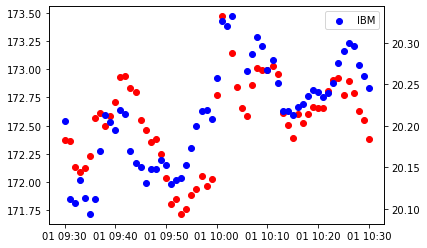

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(df_ibm_period_grouped.index, df_ibm_period_grouped["<LAST>"], c='r')
ax2.scatter(df_intc_period_grouped.index, df_intc_period_grouped["<LAST>"], c='b')
plt.legend(["IBM", "INTC"])
plt.show()

In [14]:
df_ibm_period_grouped["<LAST>"].corr(df_intc_period_grouped["<LAST>"])

0.703710956248444

In [15]:
# "Przesuwanie w czasie" spolek jedna wzgledem drugiej
# df_intc_period - dane spolki intc z jakiegos okresu
# start_datetime = datetime.datetime(year=2011, day=20, month=11, hour=12)
BEGINNING = df_intc["<TIME_DT>"].iloc[0]
ANALYSIS_TIMEWINDOW_MINUTES = 60
MOVING_START_DATETIME_MINUTES = 10
MOVED_OFFSET_MINUTES = 10

for i in range(100):
    start_datetime = BEGINNING + datetime.timedelta(minutes=MOVING_START_DATETIME_MINUTES*i)
    offset = datetime.timedelta(minutes=ANALYSIS_TIMEWINDOW_MINUTES)  # ustalamy przesuniecie czasowe na poziomie 60minut
    df_intc_period = df_intc.loc[(df_intc["<TIME_DT>"] <= start_datetime + offset) & (df_intc["<TIME_DT>"] > start_datetime)]

    moved_offset = datetime.timedelta(minutes=MOVED_OFFSET_MINUTES)  # zapiąć w fora i days=5, days=4, days=0 minutes=180 -> i patrzymy jak wyglada wspol. korelacji Pearsona
    df_ibm_period_moved = df_ibm.loc[ \
                               (df_ibm["<TIME_DT>"] >= df_intc_period["<TIME_DT>"].iloc[0] - moved_offset) \
                               & (df_ibm["<TIME_DT>"] <= df_intc_period["<TIME_DT>"].iloc[-1] - moved_offset) \
                              ]
    # display(df_ibm_period_moved)
    # datetime spolki ibm >= datetime spolki intc juz z jakiegos wskazanego wczesniej okresu, przesuniete wstecz o moved_offset
    group_plot_corr(df_ibm_period_moved, df_intc_period, plot=False)


0.6928164757806944

0.7336328404340201

0.8650584389133487

0.7729304457491147

0.7014847098053881

0.7899370576356577

0.8147062824303476

0.7275425236360328

0.5252009792517547

-0.06368119089760746

-0.19578866011096352

-0.24061963461664598

0.42657142078783955

0.12542797744793643

0.01856487517275097

0.2985769600415171

0.7264150280208054

0.9529525264871199

0.9565327157924868

0.9246545263492938

0.8656742173031424

0.8255152470331426

0.8988069211400052

0.9219696964020845

0.895760432468396

0.8893762779716632

0.8359491138100528

0.8184486718476015

0.7170466105105626

0.7551616636232809

0.740450183021811

0.7528906928455822

0.8616683630204467

0.7839585432728429

0.8137197906758071

0.8186959951239706

0.5343970855036432

0.9713760036276968

nan

IndexError: single positional indexer is out-of-bounds

https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima_model.ARIMA.html

TODO: 

porównać korelację w czasie, czy się utrzymuje na stałym poziomie
Porównać np. okienko czasowe "9:30-10:30" co tydzień (czy ten efekt się utrzymuje, czy też jest jednorazowy)


# Szeregi auro-regressive

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
data = df_ibm_period_grouped["<LAST>"].to_numpy()
index = df_ibm_period_grouped.index

### AR

In [18]:
LAG = 4
res = AutoReg(data, lags = [LAG]).fit()

In [19]:

display(res.ar_lags)

# The autoregressive lags included in the model

display(res.df_model)

# The model degrees of freedom.

# display(res.endog_names)

# Names of endogenous variables.

# display(res.exog_names)

# Names of exogenous variables included in model

# display(res.hold_back)

# The number of initial obs.

# display(res.seasonal)

array([4])

2

In [20]:
FORWARD_OFFSET = 100
y_pred = res.predict(start=0, end=len(data)+FORWARD_OFFSET)
y_true = df_ibm_period_grouped["<LAST>"].to_numpy()
print(len(df_ibm_period_grouped.index))
print(len(y_pred))

60
157


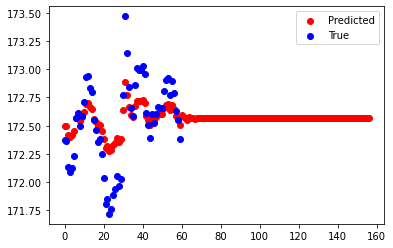

In [21]:
# plt.scatter(df_ibm_period_grouped.index[LAG-1:], y_pred, c='r')
# plt.scatter(df_ibm_period_grouped.index, y_true, c='b')
plt.scatter([idx for idx, _ in enumerate(y_pred)], y_pred, c='r')
plt.scatter([idx for idx, _ in enumerate(y_true)], y_true, c='b')
plt.legend(["Predicted", "True"])
plt.show()

In [22]:
display(mean_squared_error(y_pred, y_true[LAG-1:]))
display(mean_absolute_error(y_pred, y_true[LAG-1:]))

ValueError: Found input variables with inconsistent numbers of samples: [157, 57]

In [ ]:
res.aic, res.hqic, res.bic

In [ ]:
# LAG | MSE | MAE | AIC | HQIC | BIC

### ARIMA

In [ ]:
#The (p,d,q) order 
# p to jest samo co LAG
D = 1 # komponent zwiazany z "moving average" w modelu
Q = 2 # komponent zwiazany z bialym szumem
res_ARIMA = ARIMA(data, order=(LAG, D, Q)).fit()

In [ ]:
y_pred = res_ARIMA.predict(start=0, end=len(data)+FORWARD_OFFSET)
y_true = df_ibm_period_grouped["<LAST>"].to_numpy()
print(len(df_ibm_period_grouped.index))
print(len(y_pred))

In [ ]:
FORWARD_OFFSET = 0
plt.scatter(df_ibm_period_grouped.index, y_pred[:-1], c='r')
plt.scatter(df_ibm_period_grouped.index, y_true, c='b')
plt.legend(["Predicted", "True"])
plt.show()

In [ ]:
display(mean_squared_error(y_pred, y_true[LAG-1:]))
display(mean_absolute_error(y_pred, y_true[LAG-1:]))

res.aic, res.hqic, res.bic

### ARMAX

In [ ]:
u = df_intc_period_grouped["<LAST>"].to_numpy()

In [ ]:
display(len(data))
display(len(u))

In [ ]:
data = data[:-1]

In [ ]:
#The (p,q) order 
# p to jest samo co LAG
# D = 0 # komponent zwiazany z "moving average" w modelu - w modelu ARMAX tego komponentu nie ma
Q = 2 # komponent zwiazany z bialym szumem
res_ARMAX = ARIMA(data, order=(LAG, 0, Q), exog=u).fit()

In [ ]:
FORWARD_OFFSET = 0
y_pred = res_ARMAX.predict(start=0, end=50, exog=u[:50 + 1])  #len(data)+FORWARD_OFFSET, exog=u)


In [ ]:
# plt.scatter(df_ibm_period_grouped.index, y_pred, c='r')
# plt.scatter(df_ibm_period_grouped.index, y_true, c='b')
plt.scatter(np.linspace(0, len(y_pred), num=len(y_pred)), y_pred, c='r')
plt.scatter(np.linspace(0, len(y_true), num=len(y_true)), y_true, c='b')
plt.scatter(np.linspace(0, len(u), num=len(u)), u, c='m')
plt.legend(["Predicted", "True", "u"])
plt.show()

In [ ]:
display(mean_squared_error(y_pred, y_true[LAG-1:]))
display(mean_absolute_error(y_pred, y_true[LAG-1:]))

res.aic, res.hqic, res.bic

### Fourier

In [23]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt



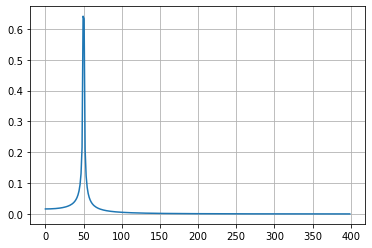

In [33]:
# Number of sample points
N = 600  # liczba probek, ale tez jednoczesnie liczba prazkow czestotliwosci
# ALE liczba probek w sygnale nie wplywa na to jaka maksymalna czestotliwosc mozemy w sygnale wylapac
# np. jezeli probkujemy sygnal co minute, to maksymalna czestotliwosc jaka jestesmy w stanie wylapac 
# to jest polowa czestotliwosci probkowania, czyli 2 minuty (dwukrotnosc okresu probkowania)
# probki musza byc rownomiernie rozmieszczone (wiec jesli jakis index giełdowy jest probkowany najpierw co sekunde a potem co np. 10 sekund no to trzeba zrobic jakas agregacje)

# sample spacing
T = 1.0 / 800.0  # okres probkowania
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x)  # sin(omega * t) = sin(2pi*freq*t)
yf = fft(y)
xf = fftfreq(N, T)[:N//2] # [:N//2] - wycinamy z widma tylko dodanie czestotliwosci na potrzeby praktycznej analizy

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))  # [:N//2] - wycinamy z widma tylko dodanie czestotliwosci na potrzeby praktycznej analizy
plt.grid()
plt.show()

In [59]:
def perform_fourier(y, T):
    yf = fft(y)  # rozbicie w szereg Fouriera
    N = len(y)
    xf = fftfreq(N, T)[:N//2]
    return yf, xf
    
def plot_fourier(xf, yf, N, T):
    # Tu plotujemy tzw. widmo Fouriera (inaczej widmo sygnału)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid()
    fs = 1 / T;
    freq_bin = fs / N  # to nam mowi o tym jak dobrze rozroznialne sa czestotliwosci w sygnale, jednostka to Hz
    plt.title(f" Freq_bin = {freq_bin} Hz, czyli {1/freq_bin} sekund")  #f - wymusza tzw. f-string czyli formatowalny string, rownie dobrze mozna napisac "{0}".format(freq_bin)
    plt.show()

def prepare_spectre_dataframe(xf, yf, N):
    df_spectre = pd.DataFrame({"Frequencies, Hz": xf, "Period, s": 1/xf, "Values": 2.0/N * np.abs(yf[0:N//2])})
    df_spectre.sort_values(by="Values", ascending=False)
    return df_spectre

60

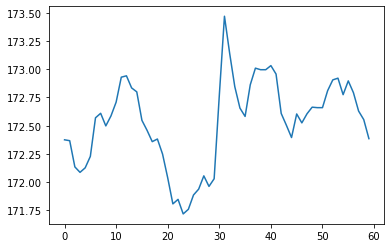

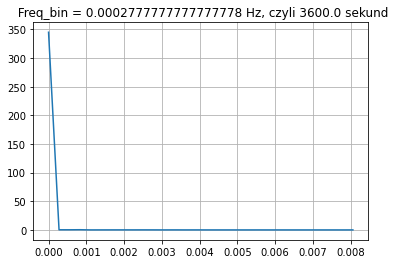

C:\Users\Darek_PC\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [60]:
# IBM
data = df_ibm_period_grouped["<LAST>"].to_numpy()
T = (df_ibm_period_grouped.index[1] - df_ibm_period_grouped.index[0]).seconds  # okres probkowania sygnalu
display(T)
N = len(df_ibm_period_grouped)  # tyle mamy probek sygnalu

plt.plot(data)
plt.show()

yf, xf = perform_fourier(data, T)
plot_fourier(xf, yf, N, T)

df_spectre_ibm = prepare_spectre_dataframe(xf, yf, N)

60

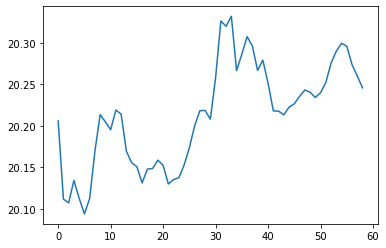

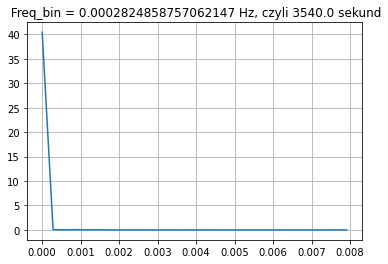

C:\Users\Darek_PC\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [62]:
# INTC
data = df_intc_period_grouped["<LAST>"].to_numpy()
T = (df_intc_period_grouped.index[1] - df_intc_period_grouped.index[0]).seconds  # okres probkowania sygnalu
display(T)
N = len(df_intc_period_grouped)  # tyle mamy probek sygnalu

plt.plot(data)
plt.show()

yf, xf = perform_fourier(data, T)
plot_fourier(xf, yf, N, T)

df_spectre_intc = prepare_spectre_dataframe(xf, yf, N)

In [76]:
def normalize_series(series):
    return (series-series.min())/(series.max()-series.min())

In [87]:
df_spectre_merged = pd.concat([df_spectre_ibm, df_spectre_intc["Values"]], axis=1)  # df_spectre_ibm df_spectre_intc["Values"]  #join(df_spectre_intc, on='Values', rsuffix="r_")
display(df_spectre_merged.head())
values_A = normalize_series(df_spectre_merged.iloc[:, -1])
values_B = normalize_series(df_spectre_merged.iloc[:, -2])
df_spectre_merged["Values_A"] = values_A
df_spectre_merged["Values_B"] = values_B
df_spectre_merged["Difference"] = abs(df_spectre_merged["Values_B"] - df_spectre_merged["Values_A"])
df_spectre_merged["Difference_wzgledna"] = df_spectre_merged["Difference"] / df_spectre_merged["Values_B"]
display(df_spectre_merged.sort_values(by="Difference_wzgledna"))
display(df_spectre_merged.sort_values(by="Difference_wzgledna").loc[df_spectre_merged["Difference_wzgledna"] < 0.05])


,"Frequencies, Hz","Period, s",Values,Values
0,0.000000,inf,345.068538,40.425807
1,0.000278,3600.0,0.243303,0.061311
2,0.000556,1800.0,0.230280,0.015450
3,0.000833,1200.0,0.348211,0.049256
4,0.001111,900.0,0.042112,0.017547


,"Frequencies, Hz","Period, s",Values,Values,Values_A,Values_B,Difference,Difference_wzgledna
0,0.000000,inf,345.068538,40.425807,1.000000,1.000000,0.000000,0.000000
6,0.001667,600.000000,0.078364,0.009511,0.000212,0.000222,0.000010,0.044014
26,0.007222,138.461538,0.012105,0.002036,0.000027,0.000030,0.000003,0.090230
14,0.003889,257.142857,0.053098,0.005954,0.000124,0.000148,0.000025,0.165428
8,0.002222,450.000000,0.075115,0.008053,0.000176,0.000212,0.000036,0.171631
3,0.000833,1200.000000,0.348211,0.049256,0.001195,0.001004,0.000191,0.190735
25,0.006944,144.000000,0.012397,0.002450,0.000037,0.000030,0.000007,0.222023
16,0.004444,225.000000,0.023040,0.004144,0.000079,0.000061,0.000018,0.290878
9,0.002500,400.000000,0.100835,0.008448,0.000185,0.000287,0.000101,0.352957
12,0.003333,300.000000,0.082956,0.006633,0.000141,0.000235,0.000094,0.401356


,"Frequencies, Hz","Period, s",Values,Values,Values_A,Values_B,Difference,Difference_wzgledna
0,0.000000,inf,345.068538,40.425807,1.000000,1.000000,0.00000,0.000000
6,0.001667,600.0,0.078364,0.009511,0.000212,0.000222,0.00001,0.044014


In [ ]:
100 - 1 = 99 - > 99/ 100 -> 0.99
10000 - 9901 = 99 -> 99 / 10000 -? 0.00099